In [2]:
#데이터 분석 프로세스
#주제선정 -> 데이터 수집 -> 데이터 처리 -> 데이터 분석 -> 정보 도출

In [25]:
#데이터 획득 처리, 시각화 심화

In [26]:
pip install pandas

  Using cached pandas-2.2.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.1-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import requests
url = 'https://github.com/wikibook/python-for-data-analysis-rev/raw/master/readme.txt'
r= requests.get(url)

file_name = "H:/code/python basic/python_basic/data/readme.txt"

with open(file_name, 'wb') as f:
    f.write(r.content)

In [29]:
#브라우저 켜지 않고 파일 유무 확인
import os
os.path.isfile(file_name)

True

In [38]:
#결측치 확인 처리

!type "H:/code/python basic/python_basic/data/missing_data_test.csv" 


������ ������ ã�� �� �����ϴ�.


In [39]:
import pandas as pd

data_file = "H:/code/python basic/python_basic/data/missing_data_test.csv"

df = pd.read_csv(data_file, encoding="cp949", index_col="연도")
df

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


In [40]:
df.isnull()# 결측치 여부 확인

,제품1,제품2,제품3,제품4
연도,,,,
2015,False,False,True,True
2016,False,False,False,True
2017,False,False,False,False
2018,False,False,False,False
2019,True,False,False,True


In [41]:
#결측치 개수 확인
df.isnull().sum()

제품1    1
제품2    0
제품3    1
제품4    3
dtype: int64

In [42]:
#행 제거

In [43]:
df.drop(index=[2019])

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


In [44]:
df.drop(columns=['제품3', '제품4'])

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200
2018,120.0,230
2019,NaN,250


In [45]:
df.drop(index=[2018, 2019],columns=['제품3', '제품4'])

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200


In [47]:
df.dropna() # 결측치가 있는 행 전부 제거

,제품1,제품2,제품3,제품4
연도,,,,
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


In [48]:
# 제품 1에 결측치가 있는 행만 제거
df.dropna(axis=0, subset=['제품1'])

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


In [49]:
#결측치가 있는 열 모두 제거 = axis 1

In [50]:
df.dropna(axis=1)

,제품2
연도,
2015,150
2016,160
2017,200
2018,230
2019,250


In [51]:
#2015 행에서 결측치 있는 열 제거 = axis=1

df.dropna(axis=1, subset=[2015])

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200
2018,120.0,230
2019,NaN,250


In [52]:
#subset에 이름 여러개 지정, 제거
df.dropna(axis=1, subset=[2016, 2019])

,제품2,제품3
연도,,
2015,150,NaN
2016,160,170.0
2017,200,100.0
2018,230,130.0
2019,250,140.0


In [55]:
df.fillna(0)
#결측치에 0 을 채운다

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,0.0,0.0
2016,200.0,160,170.0,0.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,0.0,250,140.0,0.0


In [62]:
df.fillna(method='bfill') #결측치에 열의 다음값을 넣는다

C:\Users\sonic\AppData\Local\Temp\ipykernel_23280\3350258634.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill') #결측치에 열의 다음값을 넣는다


,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,170.0,150.0
2016,200.0,160,170.0,150.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


In [64]:
df.fillna(method='ffill')# 결측치에 열의 이전값을 넣는다

C:\Users\sonic\AppData\Local\Temp\ipykernel_23280\3580152451.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')# 결측치에 열의 이전값을 넣는다


,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,120.0,250,140.0,170.0


In [68]:
#지정한 열의 결측치만 특정 값으로 채움
values = {"제품1":100, "제품4": 400}
df.fillna(value=values)

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,400.0
2016,200.0,160,170.0,400.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,100.0,250,140.0,400.0


In [69]:
#데이터의 요약 및 재구성

In [72]:
import pandas as pd

data_file = "H:/code/python basic/python_basic/data/total_sales_data.csv"


df_sales = pd.read_csv(data_file)

df_sales


,매장명,제품종류,모델명,판매,재고
0,A,스마트폰,S1,1,2
1,A,스마트폰,S2,2,5
2,A,TV,V1,3,5
3,B,스마트폰,S2,4,6
4,B,스마트폰,S1,5,8
5,B,TV,V1,6,9
6,C,스마트폰,S2,2,4
7,C,TV,V1,3,6
8,C,TV,V2,7,9


In [73]:
df_sales['매장명'].value_counts()   #

매장명
A    3
B    3
C    3
Name: count, dtype: int64

In [74]:
df_sales['제품종류'].value_counts()

제품종류
스마트폰    5
TV      4
Name: count, dtype: int64

In [75]:
# 피봇테이블로 재구성하기

In [76]:
df_sales

,매장명,제품종류,모델명,판매,재고
0,A,스마트폰,S1,1,2
1,A,스마트폰,S2,2,5
2,A,TV,V1,3,5
3,B,스마트폰,S2,4,6
4,B,스마트폰,S1,5,8
5,B,TV,V1,6,9
6,C,스마트폰,S2,2,4
7,C,TV,V1,3,6
8,C,TV,V2,7,9


In [77]:
df_sales.pivot_table(index=["매장명", "제품종류", "모델명"],
                     values=["판매","재고"], aggfunc='sum')  #aggfunc = 요약할 함수

재고  판매
매장명 제품종류 모델명        
A   TV   V1    5   3
    스마트폰 S1    2   1
         S2    5   2
B   TV   V1    9   6
    스마트폰 S1    8   5
         S2    6   4
C   TV   V1    6   3
         V2    9   7
    스마트폰 S2    4   2

In [82]:
df_sales.pivot_table(index=["매장명"], columns= ["제품종류"],
                     values=["판매","재고"], aggfunc='sum')  
#매장별로 제품 종류 에 따른 재고 판매수량

재고       판매     
제품종류  TV 스마트폰  TV 스마트폰
매장명                   
A      5    7   3    3
B      9   14   6    9
C     15    4  10    2

In [83]:
df_sales.pivot_table(index=["매장명"], columns= ["제품종류"],
                     values=["판매","재고"], aggfunc='count')  
# 매장별 TV 스마트폰  각각 재고와 판매모델 개수

재고      판매     
제품종류 TV 스마트폰 TV 스마트폰
매장명                 
A     1    2  1    2
B     1    2  1    2
C     2    1  2    1

In [84]:
#워드 클라우드 시각화

In [85]:
pip install wordcloud


  Using cached pillow-10.2.0-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
  Using cached matplotlib-3.8.3-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.49.0-cp312-cp312-win_amd64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ---------------------------------------- 301.4/301.4 kB 6.2 MB/s eta 0:00:00
Using cached matplotlib-3.8.3-cp312-cp312-win_amd64.whl (7.6 MB)
Using cached pillow-10.2.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl (187 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.4


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\sonic\AppData\Local\Temp\ipykernel_23280\766693310.py:4: SyntaxWarning: invalid escape sequence '\c'
  file_name = "H:\code\python basic\python_basic\data\littleprince_djvu.txt"


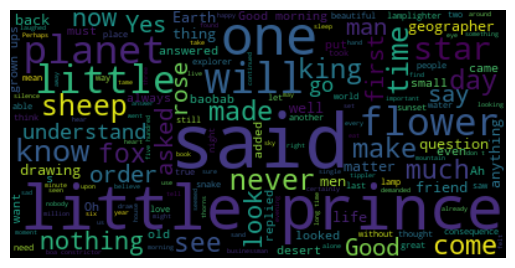

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

file_name = "H:\code\python basic\python_basic\data\littleprince_djvu.txt"

with open(file_name) as f: # 파읽 읽기모드로 열기
    text = f.read()
    
 # 워드 클라우드 이미지 생성   
wordcloud_image = WordCloud().generate(text)

#생성한 워드 클라우드 이미지 화면에 표시
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis("off")
plt.show()    

In [ ]:
#실전 데이터 분석(서울시 업무 추진비)